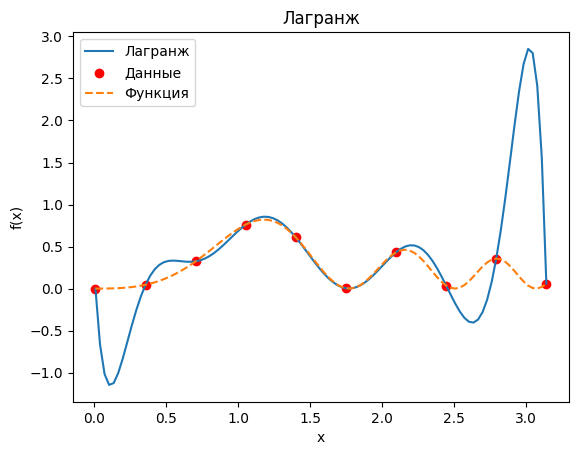

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# i-й множитель в многочлене Лагранжа
def coeff(x, i, x_points):
    res = 1
    for j in range(len(x_points)):
        if j != i:
            res *= (x - x_points[j]) / (x_points[i] - x_points[j])
    return res

# интерполяционный многочлен Лагранжа
def lagrange_interpolation(x, x_points, y_points):
    result = 0
    for i in range(len(x_points)):
        result += y_points[i] * coeff(x, i, x_points)
    return result

def f(x):
    return np.sin(x**2)**2 / x


x_points = np.linspace(0.01, np.pi, 10)
y_points = f(x_points)


x_vals = np.linspace(0.01, np.pi, 100)
y_vals = [lagrange_interpolation(x, x_points, y_points) for x in x_vals]


plt.plot(x_vals, y_vals, label="Лагранж")
plt.scatter(x_points, y_points, color='red', label="Данные")
plt.plot(x_vals, f(x_vals), '--', label="Функция")
plt.legend()
plt.title("Лагранж")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [ ]:
# разделённые разности
def divided_differences(x_points, y_points):
    n = len(x_points)
    coef = np.zeros([n, n])
    coef[:,0] = y_points

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x_points[i+j] - x_points[i])

    return coef[0]

# многочлен
def newton_interpolation(x, x_points, coef):
    n = len(coef)
    result = coef[0]
    product = 1.0
    for i in range(1, n):
        product *= (x - x_points[i-1])
        result += coef[i] * product
    return result

def f(x):
    return np.sin(1/(x + 0.2))

x_points = np.linspace(0, np.pi, 7)
y_points = f(x_points)

coef = divided_differences(x_points, y_points)

x_vals = np.linspace(0, np.pi, 100)
y_vals = [newton_interpolation(x, x_points, coef) for x in x_vals]

plt.plot(x_vals, y_vals, label="Ньютон")
plt.scatter(x_points, y_points, color='red', label="Интерполяция")
plt.plot(x_vals, f(x_vals), '--', label="Функция")
plt.legend()
plt.title("Ньютон")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()
